<a href="https://colab.research.google.com/github/kd0176/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                            **Play Store App Review Analysis**

# Table Of Contents


1.   Introduction
2.   knowing given data
3.   Cleaning Data

    *   Fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data.
    *   Dealing With NaN values.

4.   Exploratory Data Analysis

    *   Correlation between different Variables.
    *   what are the top categories in the play store which contains the highest number of apps?
    *   Top 10 Category based on average number of installs
    *   Which category has most number of installs?
    *   What are the Top 10 installed apps in 'GAME' category?
    *   Distribution of the ratings of the data frame.
    *   Distribution of 'Size' of the Apps.
    *   Apps with the highest number of reviews

   **Free & Paid Comparison**
    *   what portion of the apps in the play store are paid and free.
    *   Category wise number of free and paid apps comparision.
    *   The top 10 expensive Apps in the play store.
    *   Top 10 apps that have made the highest earning.
    *   Most installed paid app.
    *   what portion of apps available in playstore under different content rating.
    *   Total number of apps available in playstore under different genres.
    *   Positive and Negative reviews comparison.
    *   Top 10 apps that have more positive Sentiment than negative.
    *   Distribution of 'Sentiment_polarity'
    *   Distribution of 'Sentiment_Subjectivity'

#              **Introduction**

### Google Play, formerly known as Android Market, is the official distribution storefront for Android applications and other digital media, such a music, movies and books, from Google. It is available on mobile devices and tablets that run the Android operating system (OS), supported Chrome OS devices and on the web.

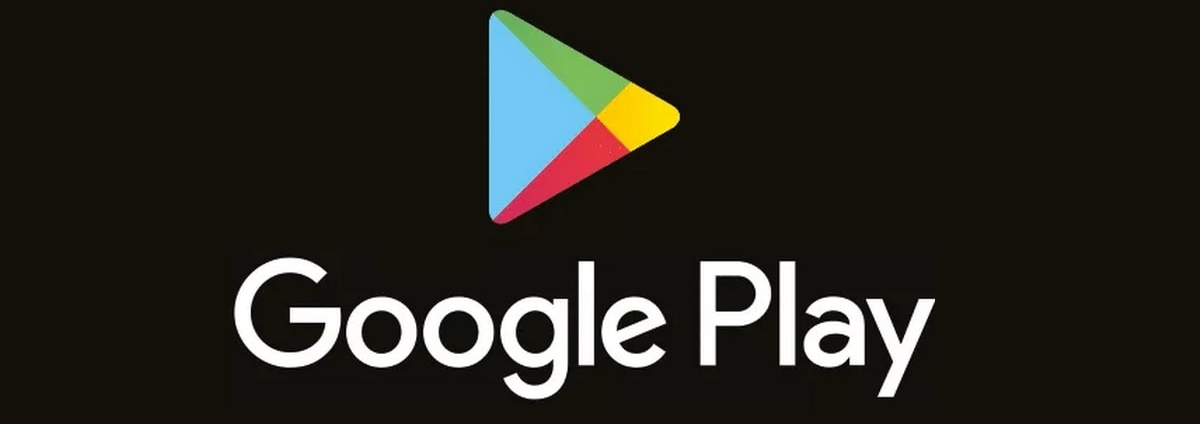

### <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

### <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

### <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
# import library
import numpy as np                    # linear algebra      
import pandas as pd                   # data processing
import matplotlib.pyplot as plt       # data visualization tool
import seaborn as sns                 # data visualization tool
%matplotlib inline

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import data files from drive
directory = '/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/Exploratory Data Analysis/Play Store App Review Analysis/'     #directory path
playstore_df = pd.read_csv(directory + 'Copy of Play Store Data.csv')      # read play store data.csv 
review_df = pd.read_csv(directory + 'Copy of User Reviews.csv')     # read user review.csv

# **knowing given data**

### we need to check and see that the dataset is ready for performing several exploration operations or not.
### Here , we have two different csv files having data related to google play store apps.
### Let’s have a look at the structure and the manner in which the data is organized.

**using pandas library's attributes and methods:**

*   **shape**: It gives number of rows and columns ina tuple.
*   **columns**: It returns column labels.
*   **info()**: It gives a concise summary of a DataFrame.
*   **head()**: Returns the first n rows.
*   **tail()**: Returns the last n rows
  









# Let's see data inside 'play store data.csv' , First

In [4]:
# number of rows and columns 
playstore_df.shape                     

(10841, 13)

In [5]:
# column labels 
playstore_df.columns                      

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
# first 5 rows
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# last 5 rows
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
# data info()
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### **-----Data Summary-----**

```
# 'playstore_df' = 'Play Store Data.csv' 
```



*   **shape** : There are 10841 rows and 13 columns in this csv.
*   **columns**: 
        1.  App : Names of android apps.
        2.  Category : Category of apps.
        3.  Ratings : average rating given by user.
        4.  Reviews : Number of Reviews.
        5.  Size : size of app in bytes.
        6.  Installs : number of installs or downloads.
        7.  Type : Free or Paid.
        8.  Price : price of app.  
        9.  Content Rating : suitable age group.
        10. Genres : genres of app.
        11. Last Updated : last updated date.
        12. Current Ver : current version available.
        13. Android Ver : suitable android versions. 











# now let's see data inside 'user review.csv'.

In [9]:
# shape
review_df.shape

(64295, 5)

In [10]:
# columns labels
review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [11]:
# info()
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [12]:
# first 5 rows
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [13]:
# last 5 rows
review_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### **-----Data Summary-----**

```
# review_df = 'User Reviews.csv'
```


*   **Shape** : There are 64295 rows and 5 columns in this csv.
*   **columns** :
        1.  App : Name of app
        2.  Translated_Review : Reviews given by users.
        3.  Sentiment : Positive, negative or Neutral opinion.
        4.  Sentiment_Polarity : Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
        5.  Sentiment_Subjectivity : Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.
                                     Subjectivity lies between [0,1]








# **Cleaning Data**
### Fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
### Dataset can contain missing data, numerical string value, various cues. If we can clean them, It will make our analyzing process easy.

## Category column

In [14]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [15]:
# get unique values 
playstore_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [16]:
# get rows having "1.9" in category column
playstore_df[playstore_df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
# Replace '1.9' with NaN
playstore_df.loc[playstore_df['Category'] == '1.9' , ['Category']] = playstore_df.loc[playstore_df['Category'] == '1.9' , ['Category']].replace('1.9' , np.nan)

## Rating column

In [18]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [19]:
# get unique values
playstore_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

`Apps rating can't be more than 5 `



In [20]:
# get rows having 19 rating
playstore_df.loc[playstore_df['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


There is only one row with 19.0 rating. and
this is the same row which had '1.9' in category column.
we can see this entire row's value has changed with each other.
we need to fix this entire row.

In [21]:
# fix row with inter changed values
for col in range(-1,-11,-1):          # for loop
 playstore_df.iloc[10472 , col] = playstore_df.iloc[10472 , col-1]

In [22]:
# replace 19.0 rating with 1.9
playstore_df.loc[playstore_df.Rating == 19 , 'Rating'] = playstore_df.loc[playstore_df.Rating == 19 , 'Rating'].replace(19,1.9)

In [23]:
playstore_df.loc[playstore_df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


## Reviews column

In [24]:
# check data type
type(playstore_df.Reviews.iloc[0])

str

In [25]:
# convert str to int
playstore_df.Reviews = playstore_df.Reviews.astype(int)

In [26]:
# check data type again
type(playstore_df.Reviews.iloc[555])

numpy.int64

## Size column

In [27]:
# get unique values
playstore_df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [28]:
# replace 'Varies with device'
playstore_df.Size.replace('Varies with device' , np.nan , inplace = True)

In [29]:
# define function to replace 'M' and 'k' and also covert str to int 
def replace_mk(size):
  if type(size) == str:
    if 'M' in size:
      size = size.replace('M' , '')                   # replace 'M' with ''
      size = float(size)                              # convert str to int data type
      size = size * 1000                              # multiply by 1000
    elif 'k' in size:
      size = size.replace('k' , '')                   # replace 'k' with ''
      size = float(size)                              # convert str to int data type
    else:
      pass      
  return size  

In [30]:
# replace 'M' and 'k'
playstore_df.Size = playstore_df.Size.apply(replace_mk)

In [31]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Installs column

In [32]:
# gat unique values
playstore_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [33]:
playstore_df.Installs = playstore_df.Installs.str.replace(',' , '')       # replace ','
playstore_df.Installs = playstore_df.Installs.str.replace('+' , '')       # replace '+'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [34]:
# convert str to int
playstore_df.Installs = playstore_df.Installs.astype(int)

In [35]:
playstore_df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

## Type column

In [36]:
# get unique values
playstore_df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [37]:
# filtering Type column for NaN
playstore_df.loc[playstore_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [38]:
# replace NaN with 'free' , since price is 0
playstore_df.loc[playstore_df.Type.isnull() , 'Type'] = playstore_df.loc[playstore_df.Type.isnull() , 'Type'].replace(np.nan , 'Free')

## Price column

In [39]:
# get unique values
playstore_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [40]:
# replace '$' 
playstore_df.loc[: , 'Price'] = playstore_df.loc[: , 'Price'].str.replace('$' , '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [41]:
# convert str into float
playstore_df.Price = playstore_df.Price.astype(float)

## Last Updated column

In [42]:
# get unique values
playstore_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [43]:
# covert string date to datetime object
from dateutil import parser
playstore_df['Last Updated'] = playstore_df['Last Updated'].apply(parser.parse)

## **Dealing With NaN**

In [44]:
# check columns with null values
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [45]:
# fillna with mean() value in 'Rating' column
playstore_df.Rating.fillna(playstore_df.Rating.mean() , inplace = True)

In [46]:
# fillna with mean() value in 'Size' column
playstore_df.Size.fillna(playstore_df.Size.mean() , inplace = True)

In [47]:
# Get remaing row with NaN value
playstore_df.loc[playstore_df['Category'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3000.0,1000,Free,0.0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up


In [48]:
# fillna as 'UNKNOWN' and 'Not Specified'
playstore_df.Category.fillna('UNKNOWN' , inplace = True)
playstore_df.Genres.fillna('UNKNOWN' , inplace = True)
playstore_df['Current Ver'].fillna('Not Specified' , inplace = True)
playstore_df['Android Ver'].fillna('Not Specified' , inplace = True)

In [49]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  float64       
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


..
## `'User Reviews.csv'`

In [50]:
# get basic information of dataset 
pd.DataFrame({'not_null_count' : review_df.count() , 'null_count' : review_df.isnull().sum() ,  'unique_count' : review_df.nunique() , 'dtype' : review_df.dtypes , } , index = review_df.columns)

,not_null_count,null_count,unique_count,dtype
App,64295,0,1074,object
Translated_Review,37427,26868,27994,object
Sentiment,37432,26863,3,object
Sentiment_Polarity,37432,26863,5410,float64
Sentiment_Subjectivity,37432,26863,4474,float64


In [51]:
# number of rows with NaN in every columns
(review_df.loc[review_df.Translated_Review.isnull() & review_df.Sentiment.isnull() & review_df.Sentiment_Polarity.isnull() & review_df.Sentiment_Subjectivity.isnull()]).shape

(26863, 5)

We can remove thses rows from dataset as these rows has nothing to explore on.

In [52]:
# drop all rows with NaN in every columns
review_df.dropna(subset = ['Sentiment'], inplace=True)

In [53]:
# remaining NaN
review_df.loc[review_df.Translated_Review.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [54]:
# drop above rows too
review_df.dropna(subset = ['Translated_Review'], inplace=True)

In [55]:
# check 'Sentiment_Polarity' value is between -1 to 1
review_df.loc[(review_df.Sentiment_Polarity > 1) | (review_df.Sentiment_Polarity < -1)] 

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [56]:
# check 'Sentiment_Subjectivity' value is between 0 to 1
review_df.loc[(review_df.Sentiment_Subjectivity > 1) | (review_df.Sentiment_Subjectivity < 0)] 

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


`Both Datasets are now ready for Exploratory Data Analysis`

# **Exploratory Data Analysis**
### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [57]:
# info()
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  float64       
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [58]:
# describe()
playstore_df.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21514.504975,1.546291e+07,1.027273
std,0.479390,2.927629e+06,20747.299749,8.502557e+07,15.948971
min,1.000000,0.000000e+00,8.500000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5900.000000,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,18000.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,26000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


## Correlation between different Variables.

In [59]:
# correlation
playstore_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068024,0.075196,0.051260,-0.020142
Reviews,0.068024,1.000000,0.128258,0.643123,-0.009666
Size,0.075196,0.128258,1.000000,0.082230,-0.022986
Installs,0.051260,0.643123,0.082230,1.000000,-0.011688
Price,-0.020142,-0.009666,-0.022986,-0.011688,1.000000


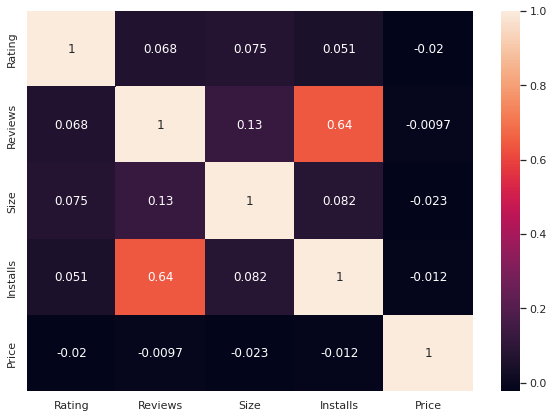

In [60]:
# visualizing correlation with heatmap
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(playstore_df.corr(), annot=True,)

----observations----

*   Rating	Reviews	Size and Installs all has positive correlation between them.
*   Only price has negative correlation with every other variables 



# Category
## what are the top categories in the play store which contains the highest number of apps? 

Text(0, 0.5, 'Number of Apps')

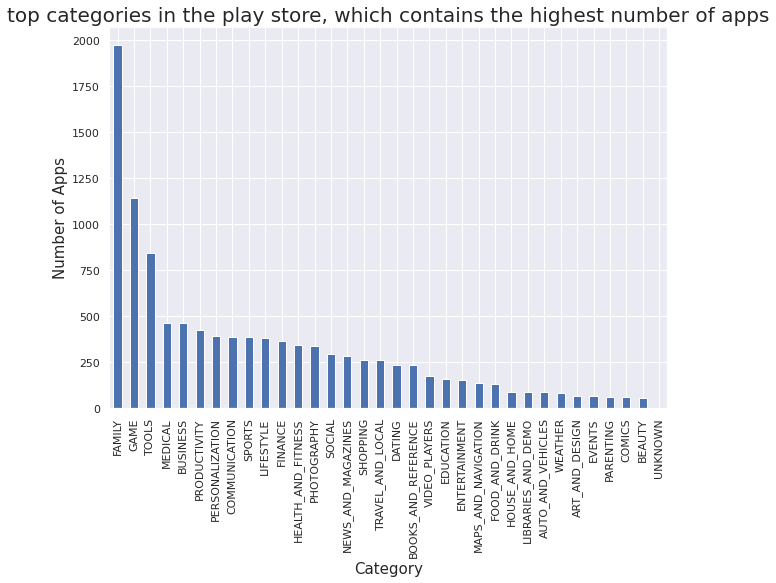

In [61]:
# top categories in the play store, which contains the highest number of apps.
plt.figure(figsize=(10,7))
playstore_df['Category'].value_counts().plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('top categories in the play store, which contains the highest number of apps' , fontsize = 20)
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Number of Apps' , fontsize = 15)

----observations----


*   **Family**, **game** and **tools** category has most number of apps in playstore.
*   **comics** and **beauty** has least number of apps in playstore.




## Top 10 Category based on average number of installs


In [62]:
# groupby category and get average number of installs , Rating and Reviews
top_cat_df = playstore_df.groupby('Category').agg({'Installs' : 'mean' , 'Rating' : 'mean' , 'Reviews' : 'mean'}).sort_values(by= 'Installs',ascending = False).reset_index()
top_cat_df.head(10)

,Category,Installs,Rating,Reviews
0,COMMUNICATION,8.435989e+07,4.163564,2.107138e+06
1,SOCIAL,4.769447e+07,4.247778,2.105903e+06
2,VIDEO_PLAYERS,3.555430e+07,4.074701,6.307439e+05
3,PRODUCTIVITY,3.343418e+07,4.207973,2.691438e+05
4,GAME,3.066960e+07,4.282431,1.385859e+06
5,PHOTOGRAPHY,3.011417e+07,4.192081,6.373631e+05
6,TRAVEL_AND_LOCAL,2.662359e+07,4.119490,2.427051e+05
7,NEWS_AND_MAGAZINES,2.648876e+07,4.142670,1.922292e+05
8,ENTERTAINMENT,1.925611e+07,4.126174,3.971688e+05
9,TOOLS,1.358573e+07,4.066044,3.240629e+05


Text(0, 0.5, 'Category')

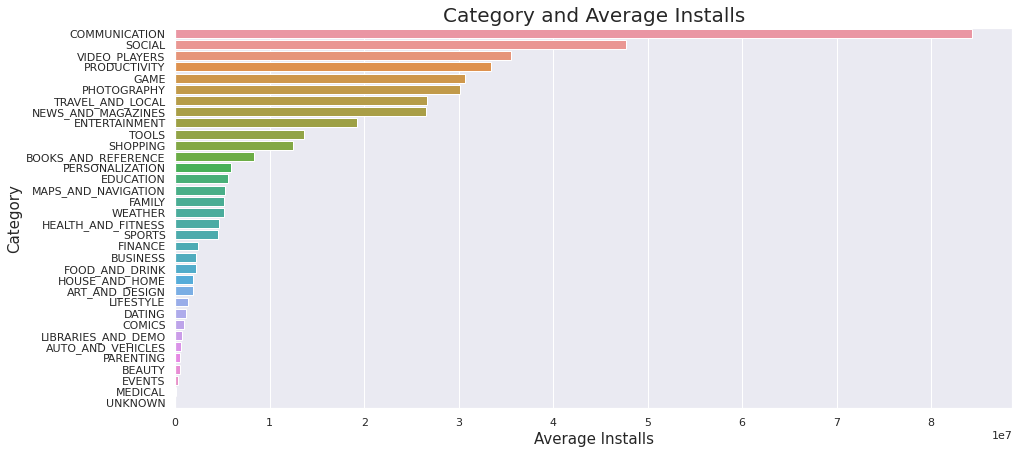

In [63]:
# plot horizontal bar graph of each category visualizing average number of installs  
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x='Installs', y='Category', data=top_cat_df)
plt.title('Category and Average Installs' , fontsize = 20)
plt.xlabel('Average Installs' , fontsize = 15)
plt.ylabel('Category',fontsize = 15)

----observations----


*   Most downloaded category based on average installs is **'Communication'** and least is **'events'** and **'medical'**
*   Every category has almost same rating average



## Which category has most number of installs?

In [64]:
# get the Top 10 installed apps in any category
highest_Installs_df = playstore_df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False).reset_index()

Text(0, 0.5, 'Total number of Installs')

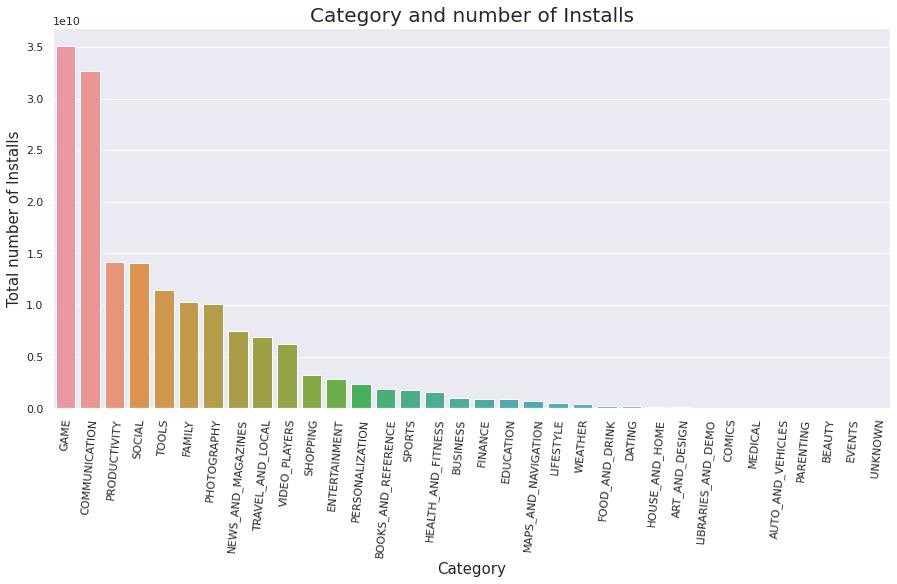

In [65]:
# plot bar graph of each category visualizing total number of installs  
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x='Category', y='Installs', data=highest_Installs_df)
plt.xticks(rotation = 85)
plt.title('Category and number of Installs' , fontsize = 20)
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total number of Installs' , fontsize = 15)

----observation----


*   The top categories with the highest installs are **Game**, **Communication**, **Productivity** and **social** respectively.




## What are the Top 10 installed apps in **'GAME'**?

In [66]:
# define function to get Top 10 installed apps in any category
def get_top10_apps(category):
  category = category.upper()  
  top10_apps = playstore_df.loc[playstore_df.Category == category , ['App' , 'Installs']].drop_duplicates().sort_values(by = 'Installs' , ascending = False).reset_index().head(10)
  return top10_apps.drop('index' , axis = 1)

Text(0, 0.5, 'Number of Installs')

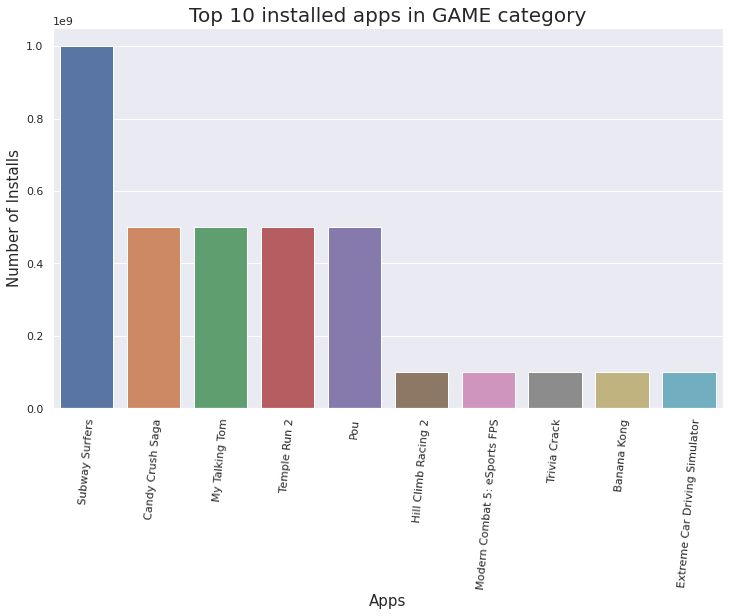

In [67]:
# Top 10 installed apps in 'GAME'
sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(x='App', y='Installs', data=get_top10_apps('game'))
plt.xticks(rotation = 85)
plt.title('Top 10 installed apps in GAME category' , fontsize = 20)
plt.xlabel('Apps',fontsize = 15)
plt.ylabel('Number of Installs' , fontsize = 15)

----observation----


*   Subway Surfers game has highest installs.



# Rating
## Distribution of the ratings of the data frame.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Rating')

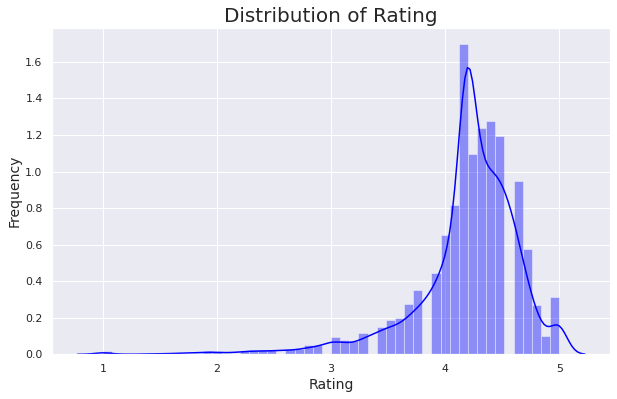

In [68]:
# plot displot to check the distribution of the ratings of the data frame
plt.figure(figsize=(10,6))
sns.distplot(playstore_df.Rating, color="Blue" , hist = True)
plt.xlabel("Rating" , size = 14)
plt.ylabel("Frequency" , size = 14)
plt.title('Distribution of Rating',size = 20)

----observations----


*   most of the apps in the google play store are rated between 3.5 to 4.8.




# Size
## Let see the Distribution of **'Size'** of the Apps.

Text(0.5, 1.0, 'Distribution of Size of apps')

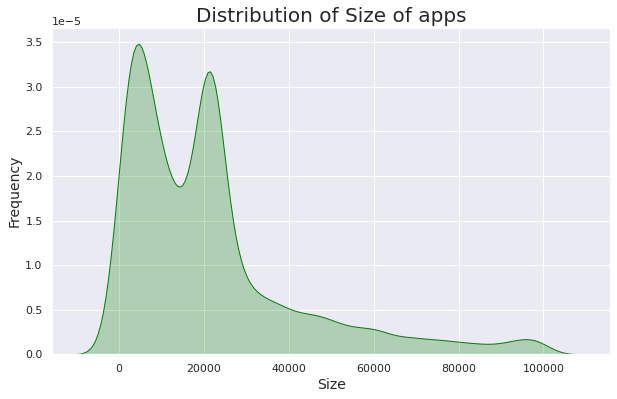

In [69]:
# plot displot to check the distribution of the size of the data frame
plt.figure(figsize=(10,6))
graph = sns.kdeplot(playstore_df.Size, color="green", shade = True)
plt.xlabel("Size" , size = 14)
plt.ylabel("Frequency" , size = 14)
plt.title('Distribution of Size of apps',size = 20)

----observation----


*   The size of most apps in playstore are between less than 1 mb to 30 mb. 



# Reviews
## Apps with the highest number of reviews

In [70]:
# Apps with the highest number of reviews
highest_reviews_df = playstore_df.sort_values(by='Reviews', ascending=False).reset_index().drop('index' , axis = 1)
highest_reviews_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,21514.504975,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
1,Facebook,SOCIAL,4.1,78128208,21514.504975,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
2,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21514.504975,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
3,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21514.504975,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
4,WhatsApp Messenger,COMMUNICATION,4.4,69109672,21514.504975,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
5,Instagram,SOCIAL,4.5,66577446,21514.504975,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
6,Instagram,SOCIAL,4.5,66577313,21514.504975,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
7,Instagram,SOCIAL,4.5,66577313,21514.504975,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
8,Instagram,SOCIAL,4.5,66509917,21514.504975,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
9,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,21514.504975,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device


----observation----


*   **Facebook**, **whatsapp Messanger** and **instagram** apps have highest number of reviews.



# Free and Paid apps comparision

## what portion of the apps in the play store are paid and free.

Text(0.5, 1.0, 'Percent of Free Vs Paid Apps in store')

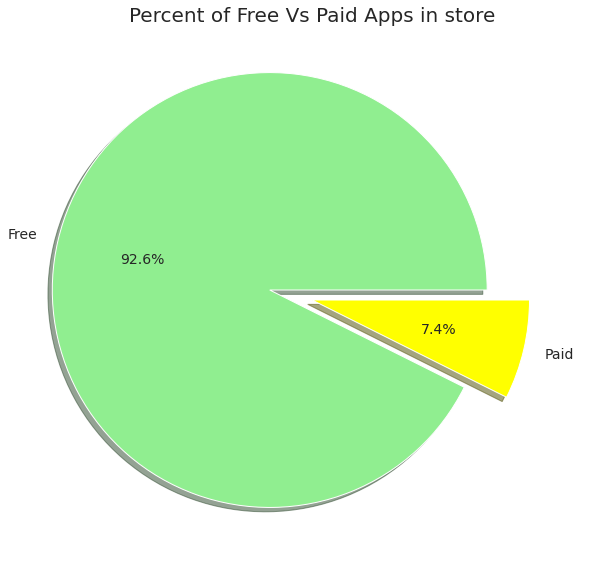

In [71]:
# plot a pie chart to view what portion of the apps in the play store are paid and free.
plt.figure(figsize=(10,10))
plt.pie(playstore_df.groupby('Type').Type.count() ,labels = playstore_df.groupby('Type').Type.count().index, colors = ["Lightgreen","Yellow"] , explode = (0.2,0) , autopct='%1.1f%%', shadow=True, startangle=0 , textprops={'fontsize': 14})
plt.title('Percent of Free Vs Paid Apps in store',size = 20)

----observations----


*   92.6% of apps in the google play store are free and Approx 7.4% are paid.



### Category wise number of free and paid apps comparision. 

In [72]:
# groupby 'category' and 'type' 
type_app_count_df = playstore_df.groupby(['Category' , 'Type']).App.size().unstack()  

Text(0, 0.5, 'Total Number of Apps')

<Figure size 1080x720 with 0 Axes>

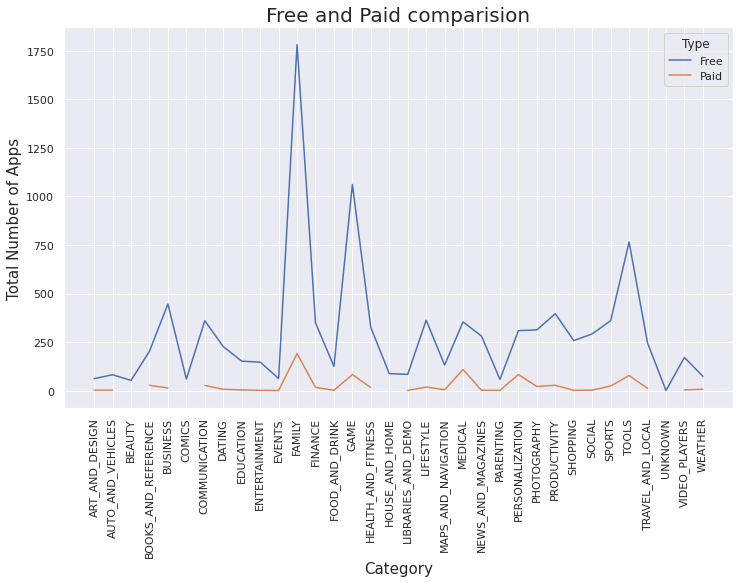

In [73]:
# plot a line graph to view the number of apps are paid and free.
plt.figure(figsize=(15,10))
type_app_count_df.plot()
plt.xticks(np.arange(len(type_app_count_df.index)), type_app_count_df.index)
plt.xticks(rotation = 90)
plt.title('Free and Paid comparision' , fontsize = 20)
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Number of Apps' , fontsize = 15)

----observations----


*   There is no category having number of more paid apps than free.



# Price
## The top 10 expensive Apps in the play store

In [74]:
# The top 10 expensive Apps in the play store
top_paid_apps = playstore_df.loc[playstore_df['Type'] == 'Paid' , ['App' , 'Price' , 'Installs']].sort_values(by='Price', ascending=False).reset_index().drop('index' , axis = 1)
top_paid_apps.head(10)

,App,Price,Installs
0,I'm Rich - Trump Edition,400.00,10000
1,I am rich(premium),399.99,5000
2,I AM RICH PRO PLUS,399.99,1000
3,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99,0
4,I am Rich Plus,399.99,10000
5,I am rich,399.99,100000
6,I am Rich!,399.99,1000
7,I Am Rich Pro,399.99,5000
8,💎 I'm rich,399.99,10000
9,I am rich (Most expensive app),399.99,1000


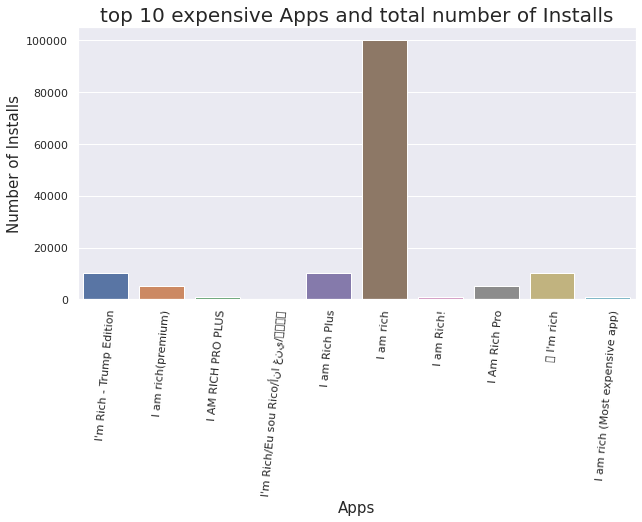

In [75]:
# plot a bar graph to visualize total number of installs of top 10 expensive Apps in the play store
import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='App', y='Installs', data=top_paid_apps.head(10))
plt.xticks(rotation = 85)
plt.title("top 10 expensive Apps and total number of Installs" , fontsize = 20)
plt.xlabel('Apps',fontsize = 15)
plt.ylabel('Number of Installs' , fontsize = 15)
plt.show()

----observations----


*   The most expensive app is **"I'm Rich - Trump Edition"**. 
*   **'I am rich'** app has most installs among all 10.



## Top 10 apps that have made the highest earning.

In [76]:
#  add a column 'earning' into 'top_paid_apps' dataframe
top_paid_apps['earning'] = top_paid_apps.Price*top_paid_apps.Installs 
highest_earning_df = top_paid_apps.sort_values(by = 'earning' , ascending = False).drop_duplicates()
highest_earning_df.head(10)

,App,Price,Installs,earning
131,Minecraft,6.99,10000000,69900000.0
5,I am rich,399.99,100000,39999000.0
11,I Am Rich Premium,399.99,50000,19999500.0
719,Hitman Sniper,0.99,10000000,9900000.0
138,Grand Theft Auto: San Andreas,6.99,1000000,6990000.0
173,Facetune - For Free,5.99,1000000,5990000.0
156,Sleep as Android Unlock,5.99,1000000,5990000.0
195,DraStic DS Emulator,4.99,1000000,4990000.0
0,I'm Rich - Trump Edition,400.00,10000,4000000.0
8,💎 I'm rich,399.99,10000,3999900.0


Text(0, 0.5, 'earning')

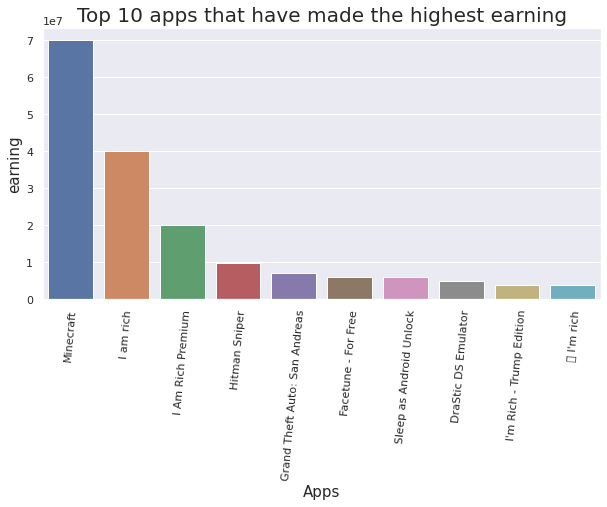

In [77]:
# plot a bar graph diaplay Top 10 apps that have made the highest earning
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='App', y='earning', data=highest_earning_df.head(10))
plt.xticks(rotation = 85)
plt.title("Top 10 apps that have made the highest earning" , fontsize = 20)
plt.xlabel('Apps',fontsize = 15)
plt.ylabel('earning' , fontsize = 15)

----observations----


*   **Minecraft** has made the highest earning. 



## Most installed paid app

Text(0, 0.5, 'Installs')

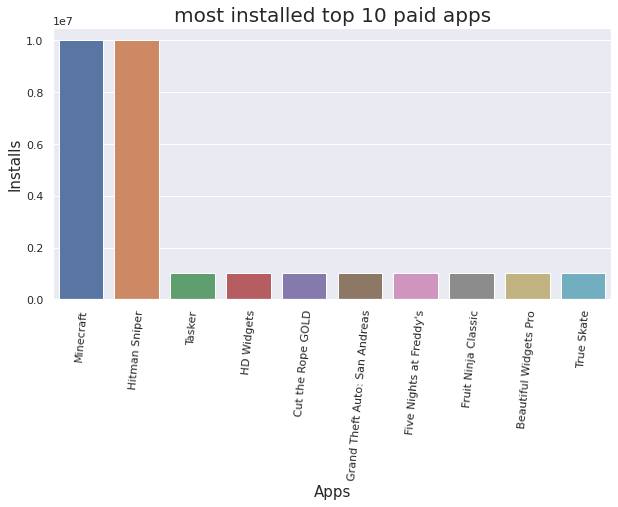

In [78]:
# most installed paid app
highest_paid_installs = top_paid_apps.sort_values(by = 'Installs' , ascending = False).drop_duplicates()
highest_paid_installs.head(10)
sns.barplot(x='App', y='Installs', data=highest_paid_installs.head(10))
plt.xticks(rotation = 85)
plt.title("most installed top 10 paid apps" , fontsize = 20)
plt.xlabel('Apps',fontsize = 15)
plt.ylabel('Installs' , fontsize = 15)

----observation---


*   **Minecraft** and **Hitman Sniper** are most downloaded apps.



# Content Rating
## what portion of apps available in playstore under different content rating.

In [79]:
# number of apps available in playstore under different content rating 
content_rating_df = playstore_df.groupby('Content Rating').App.count()
content_rating_df.reset_index()

,Content Rating,App
0,Adults only 18+,3
1,Everyone,8715
2,Everyone 10+,414
3,Mature 17+,499
4,Teen,1208
5,Unrated,2


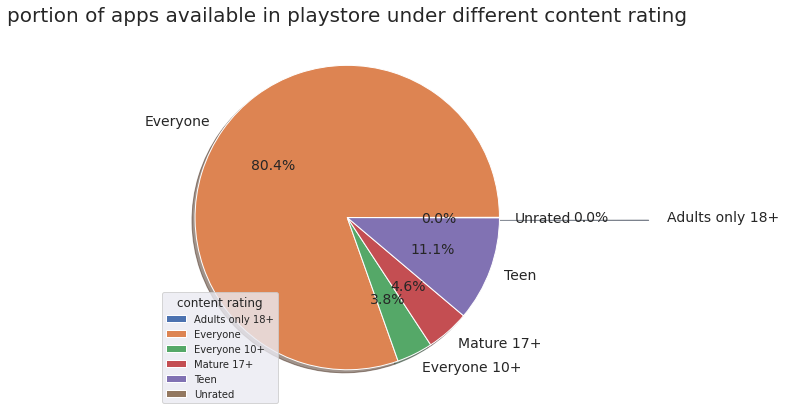

In [80]:
# plot a pie chart to view what portion of apps available in playstore under different content rating 
plt.figure(figsize = (10,7))
plot = plt.pie(content_rating_df , labels = content_rating_df.index, explode = (1,0,0,0,0,0) , autopct='%1.1f%%', shadow=True, startangle=0 , textprops={'fontsize': 14})
plt.title('portion of apps available in playstore under different content rating',size = 20)
plt.legend(content_rating_df.index, 
           loc="lower left",
           title="content rating",
           fontsize = "small"
          )

----observations----


*   80%(approx) of apps in the google play store are belongs to Everyone(content rating category).


# Genres
## Total number of apps available in playstore under different genres.

In [81]:
# get unique genres
genres_list = []      # empty list
for index , gen in enumerate(playstore_df.Genres):
  gen = gen.split(';')
  genres_list.extend(gen) 

unique_genres = set(genres_list)   

In [82]:
# Total number of apps under different genres
genres_dict = {}       # empty dict
for gen in unique_genres:
  genres_dict[gen] = 0
  for index , genres in enumerate(playstore_df.Genres):
    if gen in genres:
      genres_dict[gen] = genres_dict[gen] + 1
genres_app_count = pd.DataFrame({'genres' : genres_dict.keys() , 'app_count' : genres_dict.values()})     
genres_app_count = genres_app_count.sort_values(by = 'app_count' , ascending = False).reset_index().drop('index' , axis = 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

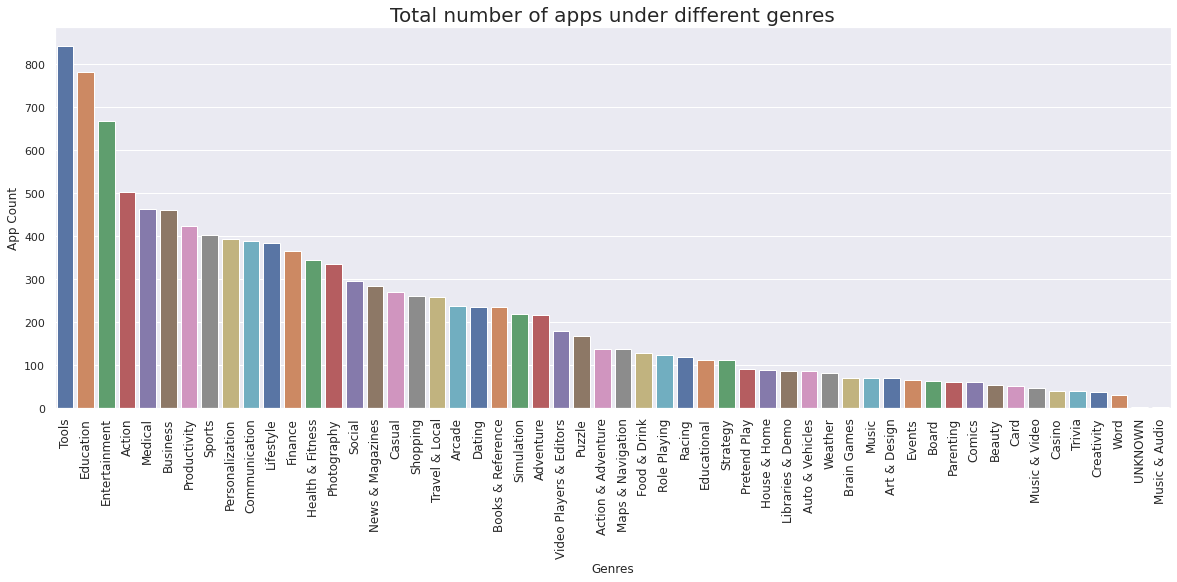

In [83]:
# plot a bar graph visualizing total number apps under each genres
plt.figure(figsize=(20,7))
sns.barplot(x='genres',y='app_count',data = genres_app_count , palette="deep")
plt.ylabel('App Count')
plt.xlabel('Genres')
plt.title("Total number of apps under different genres", fontsize = 20)
plt.xticks(rotation=90, fontsize=12)

----observations----


*   Top 3 genres having highest number of apps are **'Tools'**, **'Education'** and **'Entertainment'**.
*   There are more 50 different genres available in playstore.





```
'User Reviews.csv'
```



In [84]:
# get first 10 rows
review_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


# Sentiment

## Positive and Negative Sentiment comparison

In [85]:
# count positive , negative and neutral sentiments
sent_df = review_df.groupby(['App' , 'Sentiment']).Sentiment.size().unstack()

Text(0, 0.5, 'Total Number of reviews')

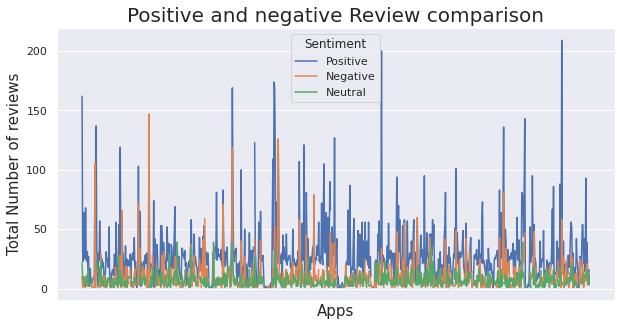

In [86]:
# plot a line graph to compare positive and negative reviews.
sent_df[['Positive', 'Negative' , 'Neutral']].plot()
plt.xticks([], [])
# plt.xticks(rotation = 40)
plt.title('Positive and negative Review comparison' , fontsize = 20)
plt.xlabel('Apps',fontsize = 15)
plt.ylabel('Total Number of reviews' , fontsize = 15)

----observations----


*   Most of the apps has more **positive sentiments**.
*   Overall **Positive** Sentiments are more in comparison to **Negative**.




## Top 10 apps that have more positive Sentiment than negative

In [87]:
# group by app and sentiment 
# count positive , negative , nautral
sentiment_df = review_df.groupby(['App' , 'Sentiment'])['Sentiment'].count().unstack()
# add a column 'Positive-Negative' containing (total positive - total negative)
sentiment_df['Positive-Negative']  = sentiment_df.Positive - sentiment_df.Negative
# sort values by 'Positive-Negative'
sentiment_df = sentiment_df.sort_values(by = 'Positive-Negative' , ascending = False).head(10).reset_index()
sentiment_df

Sentiment,App,Negative,Neutral,Positive,Positive-Negative
0,Duolingo: Learn Languages Free,34.0,6.0,200.0,166.0
1,Calorie Counter - Macros,20.0,6.0,174.0,154.0
2,10 Best Foods for You,10.0,22.0,162.0,152.0
3,Helix Jump,58.0,6.0,209.0,151.0
4,8fit Workouts & Meal Planner,19.0,15.0,137.0,118.0
5,Calorie Counter - MyFitnessPal,52.0,33.0,169.0,117.0
6,Calorie Counter - MyNetDiary,4.0,15.0,120.0,116.0
7,ColorNote Notepad Notes,7.0,3.0,121.0,114.0
8,Google Photos,47.0,1.0,143.0,96.0
9,Calorie Counter & Diet Tracker,17.0,9.0,109.0,92.0


Text(0, 0.5, '(counts)')

<Figure size 720x432 with 0 Axes>

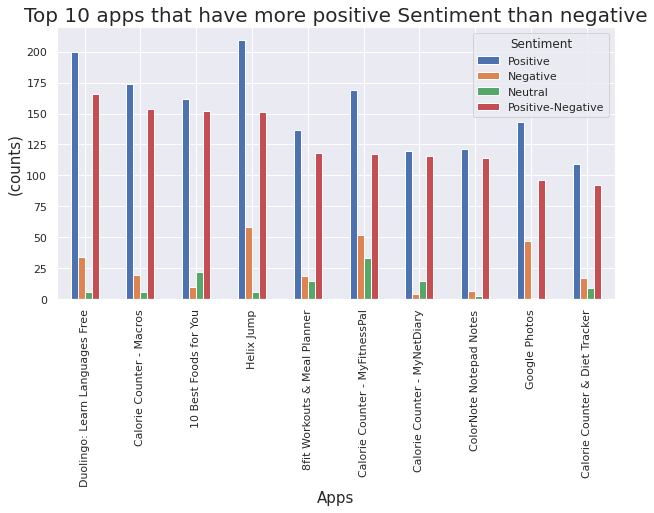

In [88]:
# plot a bar graph visualizing top 10 app that have more positive sentiment than negative
plt.figure(figsize=(10,6))
data = sentiment_df.loc[:,['App','Positive', 'Negative', 'Neutral','Positive-Negative']].set_index('App')
data.plot(kind='bar')
plt.xticks(rotation = 90)
plt.title("Top 10 apps that have more positive Sentiment than negative" , fontsize = 20)
plt.xlabel('Apps',fontsize = 15)
plt.ylabel('(counts)' , fontsize = 15)

----observations-----


*   **Duolingo: Learn Languages Free** have more Positive-Negative counts. 
*   **Calorie Counter - Macros**, **10 Best Foods for You**, and  **Helix Jump** are on 2nd, 3rd, and 4th place in race of positive-Negative counts respectively.	



## Get more information about above top 10 app from playstore dataframe

In [89]:
# get more information about above top 10 app from playstore dataframe
# left join sentiment_df and playstore_df
sentiment_df.merge(playstore_df,how='left',left_on=['App'],right_on=['App']).groupby('App').first().sort_values(by='Positive-Negative' , ascending = False)

,Negative,Neutral,Positive,Positive-Negative,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,,,,,
Duolingo: Learn Languages Free,34.0,6.0,200.0,166.0,EDUCATION,4.7,6289924,21514.504975,100000000,Free,0.0,Everyone,Education;Education,2018-08-01,Varies with device,Varies with device
Calorie Counter - Macros,20.0,6.0,174.0,154.0,HEALTH_AND_FITNESS,4.0,3061,5500.000000,100000,Free,0.0,Everyone,Health & Fitness,2016-08-27,2.3.4,5.0 and up
10 Best Foods for You,10.0,22.0,162.0,152.0,HEALTH_AND_FITNESS,4.0,2490,3800.000000,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
Helix Jump,58.0,6.0,209.0,151.0,GAME,4.2,1497361,33000.000000,100000000,Free,0.0,Everyone,Action,2018-04-09,1.0.6,4.1 and up
8fit Workouts & Meal Planner,19.0,15.0,137.0,118.0,HEALTH_AND_FITNESS,4.6,115721,67000.000000,10000000,Free,0.0,Everyone,Health & Fitness,2018-07-11,3.5.0,5.0 and up
Calorie Counter - MyFitnessPal,52.0,33.0,169.0,117.0,HEALTH_AND_FITNESS,4.6,1873516,21514.504975,50000000,Free,0.0,Everyone,Health & Fitness,2018-07-31,Varies with device,Varies with device
Calorie Counter - MyNetDiary,4.0,15.0,120.0,116.0,HEALTH_AND_FITNESS,4.5,27439,19000.000000,1000000,Free,0.0,Everyone,Health & Fitness,2018-07-16,6.5.1,5.0 and up
ColorNote Notepad Notes,7.0,3.0,121.0,114.0,PRODUCTIVITY,4.6,2401017,21514.504975,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device
Google Photos,47.0,1.0,143.0,96.0,PHOTOGRAPHY,4.5,10858556,21514.504975,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device


## Let check the distribution of **'Sentiment_polarity'**

Text(0.5, 1.0, "Distribution of 'Sentiment_polarity'")

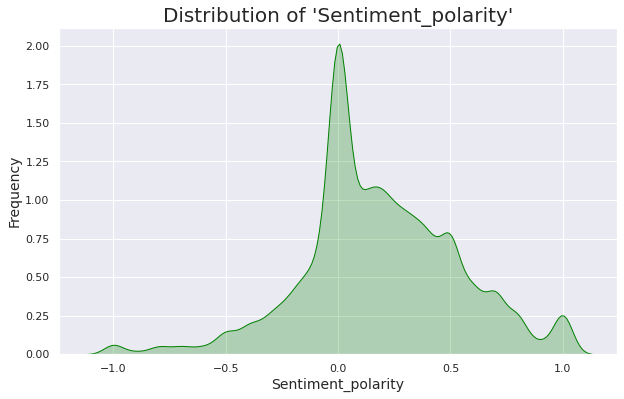

In [90]:
# plot displot to check the distribution of 'Sentiment_polarity' of the data frame
plt.figure(figsize=(10,6))
graph = sns.kdeplot(review_df.Sentiment_Polarity, color="green", shade = True)
plt.xlabel("Sentiment_polarity" , size = 14)
plt.ylabel("Frequency" , size = 14)
plt.title("Distribution of 'Sentiment_polarity'",size = 20)

----observations----

*   Most of the review's Sentiment_polarity score is between -0.5 and 0.5
*   More positive score than negative.





## Check the distribution of **'Sentiment_Subjectivity'**

Text(0.5, 1.0, "Distribution of 'Sentiment_Subjectivity'")

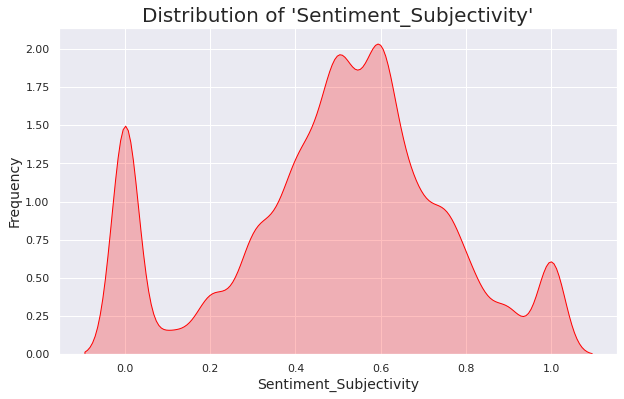

In [91]:
# plot displot to check the distribution of 'Sentiment_Subjectivity' of the data frame
plt.figure(figsize=(10,6))
graph = sns.kdeplot(review_df.Sentiment_Subjectivity, color="red", shade = True)
plt.xlabel("Sentiment_Subjectivity" , size = 14)
plt.ylabel("Frequency" , size = 14)
plt.title("Distribution of 'Sentiment_Subjectivity'",size = 20)

----observations----

*   Most of the review's Sentiment_Subjectivity score is between 0.3 to 0.8
*   There are more sentiment subjective reviews as compared to neutral.





# **Conclusion**